## Toxic Comment Classification

#### Imports:

In [68]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Conv1D, GlobalMaxPooling1D

#### Data:

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data/train.csv')

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df.shape

(159571, 8)

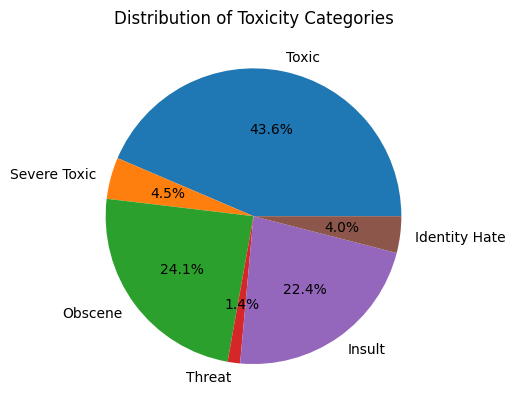

In [18]:
toxic_counts = (df['toxic'] == 1).sum()
severe_toxic_counts = (df['severe_toxic'] == 1).sum()
obscene_counts = (df['obscene'] == 1).sum()
threat_counts = (df['threat'] == 1).sum()
insult_counts = (df['insult'] == 1).sum()
identity_hate_counts = (df['identity_hate'] == 1).sum()

categories = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate']
counts = [toxic_counts, severe_toxic_counts, obscene_counts, threat_counts, insult_counts, identity_hate_counts]

plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Distribution of Toxicity Categories')

plt.show()

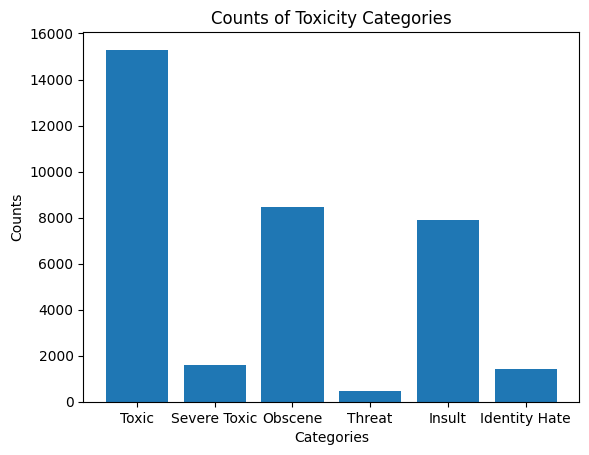

In [15]:
toxic_counts = (df['toxic'] == 1).sum()
severe_toxic_counts = (df['severe_toxic'] == 1).sum()
obscene_counts = (df['obscene'] == 1).sum()
threat_counts = (df['threat'] == 1).sum()
insult_counts = (df['insult'] == 1).sum()
identity_hate_counts = (df['identity_hate'] == 1).sum()

categories = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate']
counts = [toxic_counts, severe_toxic_counts, obscene_counts, threat_counts, insult_counts, identity_hate_counts]

plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Toxicity Categories')

plt.show()

In [27]:
# Extract text data and labels
texts = df['comment_text'].values
labels = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [28]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [29]:
# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Maximum sequence length
max_len = max([len(seq) for seq in sequences])

# Padding sequences to have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Word embedding dimension
embedding_dim = 100

#### Approach 1: LSTM

In [30]:
# Define the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(6, activation='sigmoid'))

In [31]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1403, 100)         21033800  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 21,151,822
Trainable params: 21,151,822
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(padded_sequences, labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
3990/3990 [==============================] - 301s 75ms/step - loss: 0.0486 - accuracy: 0.9939 - val_loss: 0.0475 - val_accuracy: 0.9939
Epoch 2/5
3990/3990 [==============================] - 228s 57ms/step - loss: 0.0394 - accuracy: 0.9937 - val_loss: 0.0468 - val_accuracy: 0.9941
Epoch 3/5
3990/3990 [==============================] - 228s 57ms/step - loss: 0.0327 - accuracy: 0.9924 - val_loss: 0.0498 - val_accuracy: 0.9932
Epoch 4/5
3990/3990 [==============================] - 227s 57ms/step - loss: 0.0266 - accuracy: 0.9746 - val_loss: 0.0538 - val_accuracy: 0.9841
Epoch 5/5
3990/3990 [==============================] - 216s 54ms/step - loss: 0.0211 - accuracy: 0.8817 - val_loss: 0.0601 - val_accuracy: 0.9240


In [36]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')

    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

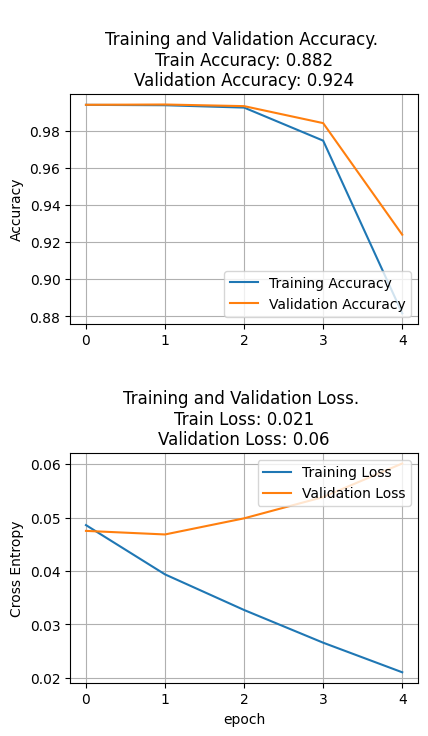

In [37]:
plot_history(history)

#### Approach 2: Bi-directional LSTM

In [61]:
# Define the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [62]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1403, 100)         21033800  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 21,285,134
Trainable params: 21,285,134
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(padded_sequences, labels, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
3990/3990 [==============================] - 398s 100ms/step - loss: 0.0343 - accuracy: 0.9912 - val_loss: 0.0468 - val_accuracy: 0.9940
Epoch 2/3
3990/3990 [==============================] - 396s 99ms/step - loss: 0.0280 - accuracy: 0.9814 - val_loss: 0.0522 - val_accuracy: 0.9921
Epoch 3/3
3990/3990 [==============================] - 395s 99ms/step - loss: 0.0219 - accuracy: 0.9477 - val_loss: 0.0594 - val_accuracy: 0.9637


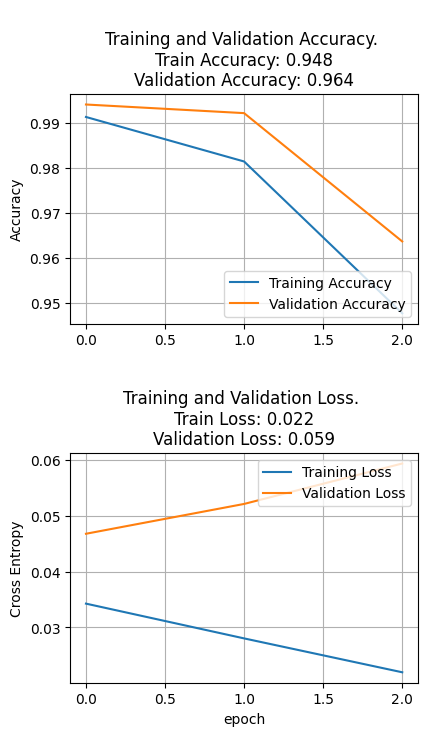

In [67]:
plot_history(history)

#### Approach 3: CNN

In [69]:
# Define the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [70]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1403, 100)         21033800  
                                                                 
 conv1d (Conv1D)             (None, 1399, 128)         64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 21,106,574
Trainable params: 21,106,574
Non-trainable params: 0
__________________________________________

In [72]:
history = model.fit(padded_sequences, labels, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
3990/3990 [==============================] - 208s 51ms/step - loss: 0.0593 - accuracy: 0.9836 - val_loss: 0.0497 - val_accuracy: 0.9939
Epoch 2/3
3990/3990 [==============================] - 89s 22ms/step - loss: 0.0370 - accuracy: 0.9834 - val_loss: 0.0461 - val_accuracy: 0.9940
Epoch 3/3
3990/3990 [==============================] - 78s 20ms/step - loss: 0.0260 - accuracy: 0.9279 - val_loss: 0.0539 - val_accuracy: 0.6760


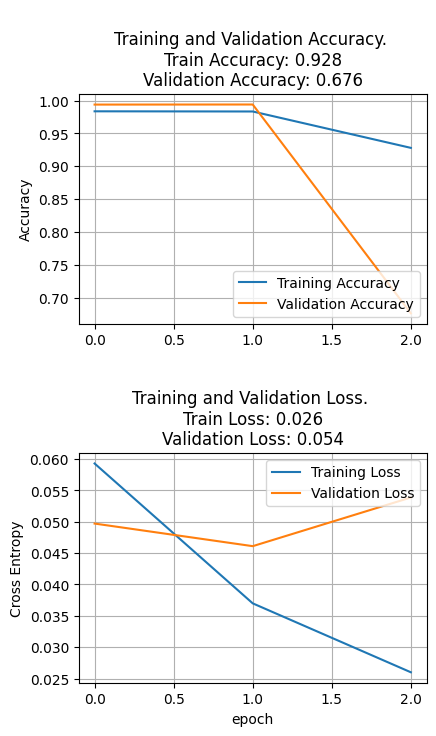

In [73]:
plot_history(history)